<a href="https://colab.research.google.com/github/dhruv-L/MachineLearninngProject/blob/main/TMDL_2024_25_Assignment_3%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:

df = pd.read_csv('/content/tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

homepage, overview, realese_date, runtime, tagline



### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [3]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [4]:
df = df.dropna() # drop na values
df = df.reset_index(drop=True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [5]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# Encodes text labels into a one-hot encoded list
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
        out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []  # Correct variable name
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = encoded_labels


100%|██████████| 4800/4800 [00:00<00:00, 11752.83it/s]


Verify that one-hot encodings are indeed as expected

In [6]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

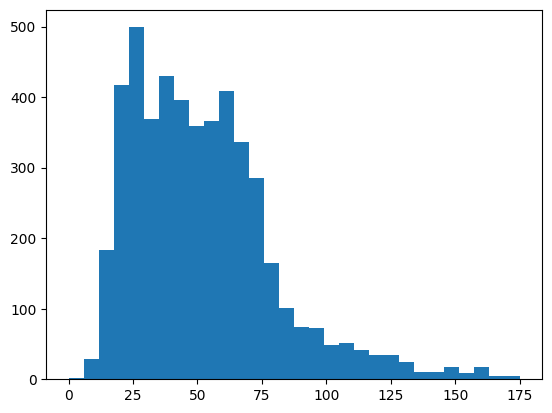

In [7]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []
for index, row in df.iterrows():
    cleaned_text = remove_punctuation(row['overview']).lower()
    processed_overviews.append(cleaned_text)

# loop over df, remove punctuation, make words lowercase and add it to a new column
...
df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = [len(overview.split()) for overview in processed_overviews]
...

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens, bins=30)
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

Shortest - 5
Longest - 175
Standard - 50 (25 to 125)


### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [8]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len].copy()

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: " ".join(x.split()[:token_len]))

# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [9]:
# hint: store all words for all movies in a set, change it to a list and sort

vocab = set()
for index, row in df.iterrows():
    vocab.update(row["proc_overview"].split())

sorted_vocab = sorted(list(vocab))

vocab_len = len(sorted_vocab)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [10]:
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(sorted_vocab))   # set of encodings for this overview
    for word in row["proc_overview"]:
        if word != '':  # Ensure we are only processing non-empty words
            if word in sorted_vocab:  # Check if the word exists in the vocabulary
                sentence_encode[sorted_vocab.index(word)] += 1  # get encoding for this word
    encoded_labels.append(sentence_encode)   # sum over axis=1

df["one_hot_overview"] = encoded_labels
df['one_hot_overview']  # print to verify


# Assuming the following variables:
num_vectors = len(df)  # Number of movies
num_elements_per_vector = len(sorted_vocab)  # Vocabulary size (length of sorted_vocab)
float_size_in_bytes = 16  # 64-bit float size in bytes

# Calculate the total storage required
total_storage_bytes = num_vectors * num_elements_per_vector * float_size_in_bytes

print(f"Total storage required: {total_storage_bytes} bytes")


100%|██████████| 4707/4707 [01:53<00:00, 41.40it/s]

Total storage required: 940872816 bytes


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

number of vectors* number of elements in each vector* size of each float

940872816 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

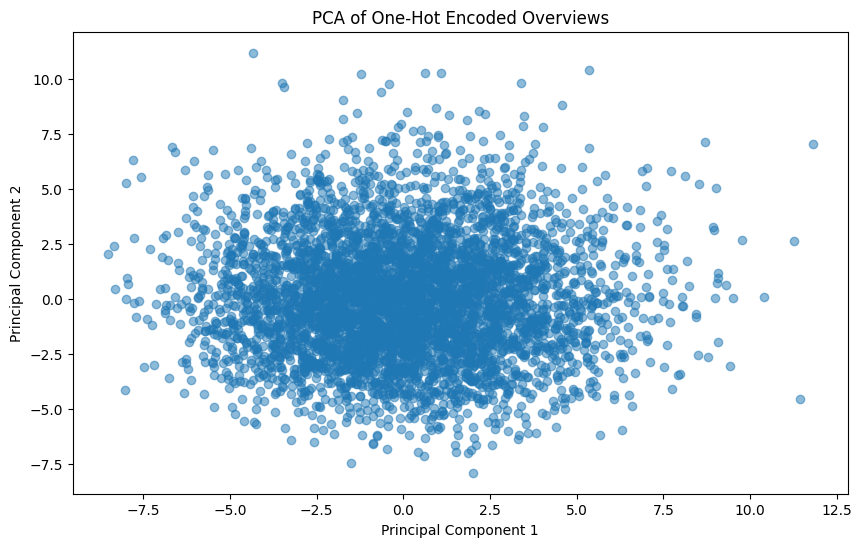

In [11]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA


X = np.vstack(df["one_hot_overview"].values)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of One-Hot Encoded Overviews")
plt.show()

# we did exactly this in the lecture notebook

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

The data doesn't really provide any interpratble structure becasue it uses one hot encoding and is not some number like we saw in the lecture

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

The code below doesn't run for some reason

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

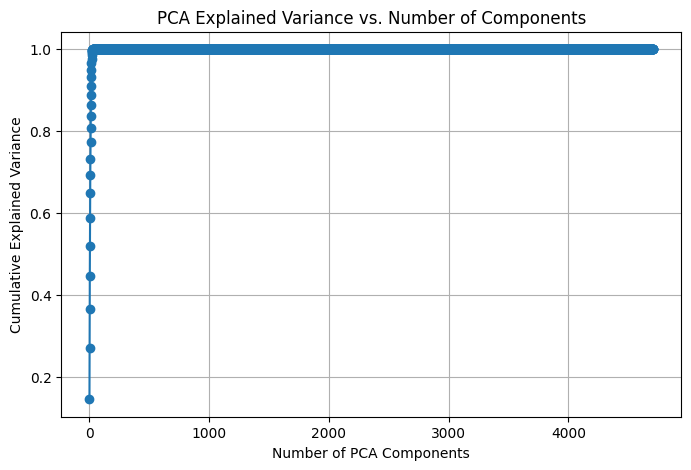

In [13]:
X = np.vstack(df["one_hot_overview"].values)

pca = PCA()
X_pca = pca.fit_transform(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [14]:
threshold = 0.80
components_needed = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of PCA components needed to explain 80% of the variance: {components_needed}")

Number of PCA components needed to explain 80% of the variance: 11


11

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [16]:

n_dims = 50
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(np.vstack(df["one_hot_overview"].values))

df["overview_pca"] = labels_pca.tolist()

df.head()

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.7265152060671554, 1.2446564530793682, -2.0..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.7737918880242591, -0.4245374842453542, -3...."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.769288250507426, 0.4320886168316284, 0.808..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.1584732478984883, 1.529630088692824, 3.2699..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.127382201966777, 3.815996140587894, -1.3690..."


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [17]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=20
kmeans = KMeans(n_clusters=20, random_state=0)
# Fit the model using the PCA-transformed features
y_preds = kmeans.fit_predict(labels_pca)

# Add the predicted cluster labels as a new column in the dataframe
df["cluster_kmeans"] = y_preds

# Print out elements of cluster 0
cluster_0 = df[df["cluster_kmeans"] == 0]
print(cluster_0)

                                         title  \
15    The Chronicles of Narnia: Prince Caspian   
59                                        2012   
64                           X-Men: Apocalypse   
86                         Shrek Forever After   
110                               Pearl Harbor   
...                                        ...   
4707                 Antarctic Edge: 70° South   
4728                     Indie Game: The Movie   
4753                       The Call of Cthulhu   
4755                                The Signal   
4774                                    Manito   

                                               overview  \
15    One year after their incredible adventures in ...   
59    Dr. Adrian Helmsley, part of a worldwide geoph...   
64    After the re-emergence of the world's first mu...   
86    A bored and domesticated Shrek pacts with deal...   
110   The lifelong friendship between Rafe McCawley ...   
...                                          

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

X-Men and shrek together is pretty weird clustering becasue I woud never think they would be simalir at all.

I think X-Men and pearl harbour sort of makes sense as both involve a lot of action but still are relatively different

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

Around 5-7 because aftewards the adding more clusters no longer significantly reduces the clustering error

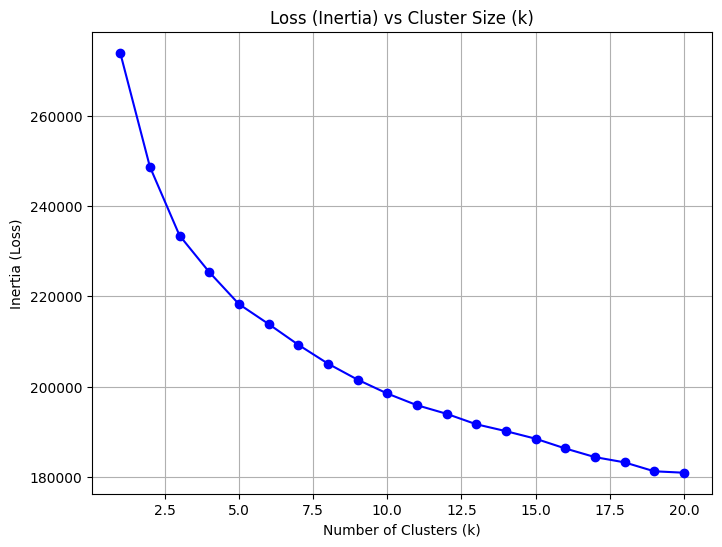

In [18]:
k_values = range(1, 21)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df["overview_pca"].tolist())
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Loss (Inertia) vs Cluster Size (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Loss)')
plt.grid(True)
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [20]:

from sklearn.mixture import GaussianMixture
K = 20

gmm = GaussianMixture(n_components=K, random_state=0)
df['cluster_gmm'] = gmm.fit_predict(df["overview_pca"].tolist())

cluster_number = 0
cluster_data = df[df['cluster_gmm'] == cluster_number]

print(cluster_data[['title', 'overview', 'genres']])

                             title  \
275                Minority Report   
284                 Little Fockers   
474                      Evolution   
523                 Vertical Limit   
658                     Death Race   
...                            ...   
4545       Everything Put Together   
4604                   Tumbleweeds   
4682  The Case of the Grinning Cat   
4718        The Work and The Story   
4720                   The Gallows   

                                               overview  \
275   John Anderton is a top 'Precrime' cop in the l...   
284   It has taken 10 years, two little Fockers with...   
474   11-year-old Nicolas lives with his mother in a...   
523   Trapped near the summit of K2, the world's sec...   
658   Terminal Island, New York: 2020. Overcrowding ...   
...                                                 ...   
4545  Everything Put Together is a 2000 film directe...   
4604  A woman constantly runs from town to town with...   
4682  Paris 

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

I tink it is a bit better than the k_means, Although I dont know the movies the generes are more simalir in the cluster

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

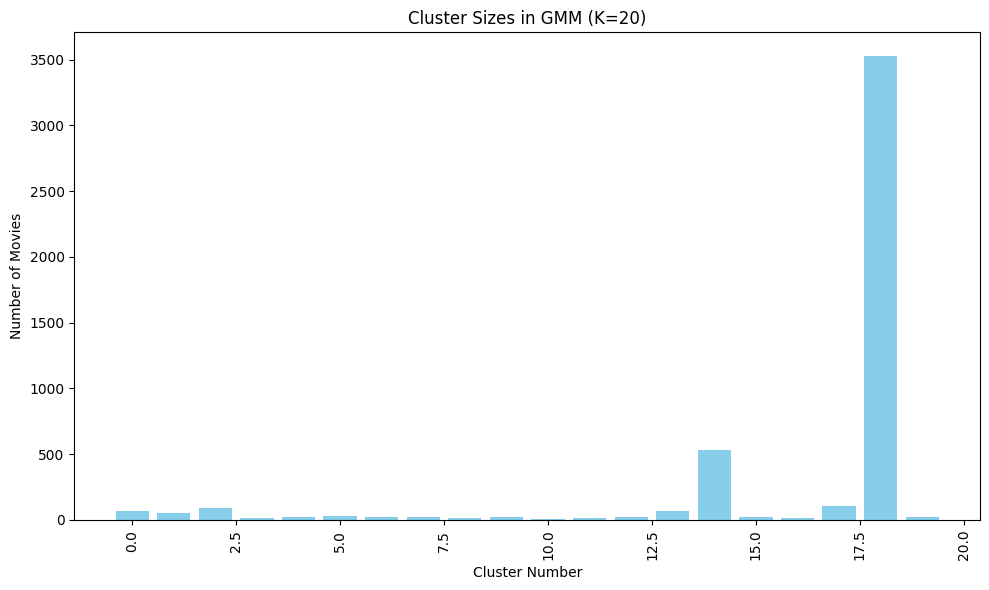

In [21]:
cluster_sizes = df['cluster_gmm'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')

# Add labels and title
plt.xlabel('Cluster Number')
plt.ylabel('Number of Movies')
plt.title('Cluster Sizes in GMM (K=20)')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

cluster 18 has most of the movies and the rest have an insignficant amount of movies comparitively.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [22]:
prev_watch = "Avatar"

avatar_index = df[df['title'] == "Avatar"].index[0]

# Find the cluster index for K-means and GMM for Avatar
cluster_kmeans = df.loc[avatar_index, 'cluster_kmeans']
cluster_gmm = df.loc[avatar_index, 'cluster_gmm']

# Print out suggestions for movies in the same clusters
print(f"Recommendations based on K-means clustering (Cluster {cluster_kmeans}):")
print(df[df['cluster_kmeans'] == cluster_kmeans]['title'].tolist())

print(f"\nRecommendations based on GMM clustering (Cluster {cluster_gmm}):")
print(df[df['cluster_gmm'] == cluster_gmm]['title'].tolist())

Recommendations based on K-means clustering (Cluster 12):
['Avatar', 'Avengers: Age of Ultron', 'Jurassic World', 'X-Men: The Last Stand', 'Jack the Giant Slayer', 'The Polar Express', 'The Curious Case of Benjamin Button', 'Mission: Impossible III', 'Troy', 'Armageddon', 'The Last Samurai', 'Watchmen', 'The Revenant', 'Batman & Robin', 'RoboCop', 'Around the World in 80 Days', 'Minority Report', 'Harry Potter and the Chamber of Secrets', 'The Taking of Pelham 1 2 3', 'Point Break', 'Black Hawk Down', 'The Lord of the Rings: The Return of the King', 'Tropic Thunder', 'Die Hard: With a Vengeance', 'Scooby-Doo', 'The Hunger Games', 'The Legend of Zorro', 'Now You See Me', 'The Man from U.N.C.L.E.', 'Hostage', 'The Kingdom', 'Two Brothers', 'Star Trek: Insurrection', 'Ballistic: Ecks vs. Sever', 'Mona Lisa Smile', 'The Green Mile', 'Any Given Sunday', 'The Scorpion King', 'Event Horizon', 'The Monkey King 2', 'The Flintstones in Viva Rock Vegas', 'Red Tails', 'Evita', 'The Fan', 'The Brea

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

Both systems are alright they have their pros and cons

k means groups movies into similar clusters based on their overviews. However, results can be inconsistent if the clusters aren't well-separated.

Cosine simalrity

More precise because it measures direct similarity rather than a broad category.

Therefore i would reccomend the cosine similarity system

**Q6.3** How would you try making the recommender systems better?

Neither system considers user preferences, ratings, or popularity, which are important in real-world recommendations. So taking that into account would drastically improve the systems.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

I would try to average feature vectors or weight them based on how much they liked a certain movie or how recentky it was watched

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [23]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


avatar_index = df[df['title'] == "Avatar"].index[0]
prev_watch_enc = df.loc[avatar_index, 'overview_pca']


sims = []
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row["overview_pca"]))


df["cos_sim_to_avatar"] = sims

df = df.sort_values(by="cos_sim_to_avatar", ascending=False)

df.head(10)[["title", "cos_sim_to_avatar"]]

,title,cos_sim_to_avatar
0,Avatar,1.000000
1140,Micmacs,0.749712
3017,The Fourth Kind,0.694867
208,The 13th Warrior,0.687284
3998,Ida,0.657408
2695,Jason X,0.648592
3137,Gunless,0.648380
4617,Fighting Tommy Riley,0.643562
3685,Camping Sauvage,0.613250
2035,Our Kind of Traitor,0.612335


Unlike clustering, this method finds movies that are mathematically closest, rather than forcing them into pre-defined groups.

Recommendations adjust dynamically based on the selected movie, rather than relying on rigid clusters.



# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [24]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

Train Accuracy: 0.0000
Test Accuracy: 0.0000
Mean Training Time: 1.8530 seconds
Mean Inference Time: 0.000040 seconds per sample


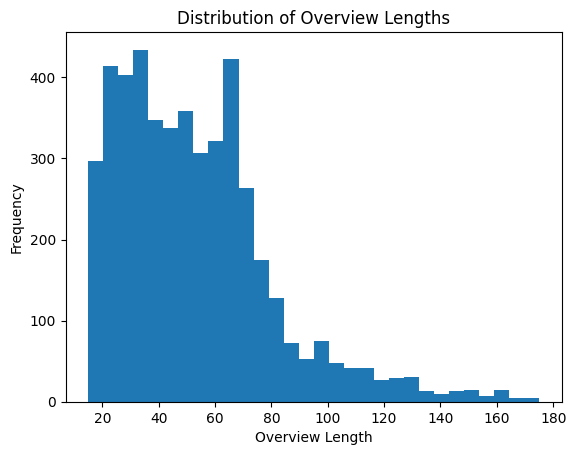

In [39]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Preprocessing
import re

# Add to dataframe
df["proc_overview"] = processed_overviews

# Step 2: Vectorize the overviews using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features to avoid overfitting
X = vectorizer.fit_transform(df["proc_overview"]).toarray()

# Step 3: Preparing the target variable (one-hot encoded genres)
# Assuming the target variable is already one-hot encoded in the "one_hot_genres" column
y = np.vstack(df["one_hot_genres"].values)

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model selection and training (Random Forest Classifier)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Train the model and measure training time
start_time = time.time()
rf.fit(X_train, y_train)
train_time = time.time() - start_time

# Predict on test set and measure inference time
start_time = time.time()
y_pred = rf.predict(X_test)
inference_time = (time.time() - start_time) / len(X_test)  # Per sample

# Calculate accuracy
train_score = accuracy_score(y_train, rf.predict(X_train))
test_score = accuracy_score(y_test, y_pred)

# Print results
print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Mean Training Time: {train_time:.4f} seconds")
print(f"Mean Inference Time: {inference_time:.6f} seconds per sample")

overview_lens = [len(overview.split()) for overview in processed_overviews]
plt.hist(overview_lens, bins=30)
plt.xlabel("Overview Length")
plt.ylabel("Frequency")
plt.title("Distribution of Overview Lengths")
plt.show()


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

I chose to use a Random Forest Classifier because they're easy to use and perform well for many classification tasks. First, I needed to change the movie overviews into numbers, so I used TF-IDF vectorization to help identify important words for each movie description. Then, I trained the model to predict the movie genre based on the overview. When I trained the model, I tuned parameters like the number of trees (n_estimators=50) and the max depth of each tree (max_depth=10) to try and make the model better. After training, I looked at the accuracy on the training data and the test data, since I wanted to get an idea of how well the model was doing. If I continued working on this, I would try more advanced tuning, like GridSearchCV, so that tuning was automatic. I would also try other models instead of a random forest, like Logistic Regression or Decision Trees, to see if I perform better with those models. Having more training data would also help the model!

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)